<a href="https://colab.research.google.com/github/PrasanthGubbala/MS-in-Information-Science-Machine-Learning/blob/dev/Course3/Assignment5/IML_Week_5_Assignment_Learner_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week5 : Tree Based Methods

### Objectives
This homework sheet will help reviewing the basic concepts associated with tree-based methods and provide a basic introduction to the ML workflow using real-world datasets. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

The following website has access to the relevant datasets from the recommended textbook: https://book.huihoo.com/introduction-to-statistical-learning/data.html

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| 1     | 3      |
| 2     | 3     |
| 3a     | 2     |
| 3b     | 2     |
| 3c     | 5     |

# Questions

Conceptual


Q1. Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1$, $R_2$, ... , the cutpoints $t_1$ , $t_2$, ..., and so forth. Please insert your sketch below.


**Please note: You can use Microsoft word / any editor or draw the image by hand, you can upload the image / screenshot  to colab file using insert image option in text cell**


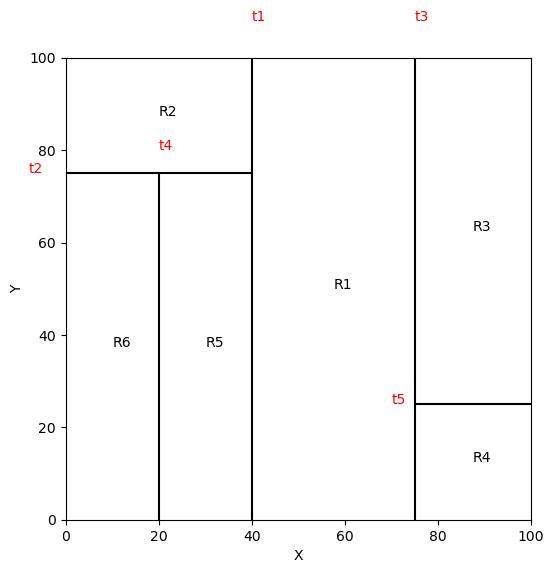

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(6, 6))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("X")
plt.ylabel("Y")

# t1: x = 40; (40, 0) (40, 100)
plt.plot([40, 40], [0, 100], color='black')
plt.text(40, 108, "t1", color="red")

# t2: y = 75; (0, 75) (40, 75)
plt.plot([0, 40], [75, 75], color='black')
plt.text(-8, 75, "t2", color="red")

# t3: x = 75; (75,0) (75, 100)
plt.plot([75, 75], [0, 100], color='black')
plt.text(75, 108, "t3", color="red")

# t4: x = 20; (20,0) (20, 75)
plt.plot([20, 20], [0, 75], color='black')
plt.text(20, 80, "t4", color="red")

# t5: y=25; (75,25) (100,25)
plt.plot([75, 100], [25, 25], color='black')
plt.text(70, 25, "t5", color="red")

# Regions
plt.text((40 + 75) / 2, 50, "R1")
plt.text(20, (100 + 75) / 2, "R2")
plt.text((75 + 100) / 2, (100 + 25) / 2, "R3")
plt.text((75 + 100) / 2, 25 / 2, "R4")
plt.text(30, 75 / 2, "R5")
plt.text(10, 75 / 2, "R6")

# Show the plot
plt.show()



```
                [Root]
                /    \
          [X1 < t1]  [X1 >= t1]
          /           \
     [X2 < t2]   [X2 >= t2]
      /      \       /      \
   R1       R2     R3      R4
   |         |       |        |
[R5]     [R6]   [R7]   [R8, R9]
```

In this representation:

- The root node splits based on \(X_1\) with threshold \(t_1\).
- The left branch ( \(X_1 < t_1\) ) further splits based on \(X_2\) with threshold \(t_2\).
  - The leftmost leaf node is labeled as \(R5\).
  - The rightmost leaf node is labeled as \(R6\).
- The right branch ( \(X_1 >= t_1\) ) further splits based on \(X_2\) with threshold \(t_3\).
  - The leftmost leaf node is labeled as \(R7\).
  - The rightmost subtree contains two leaf nodes, labeled as \(R8\) and \(R9\).


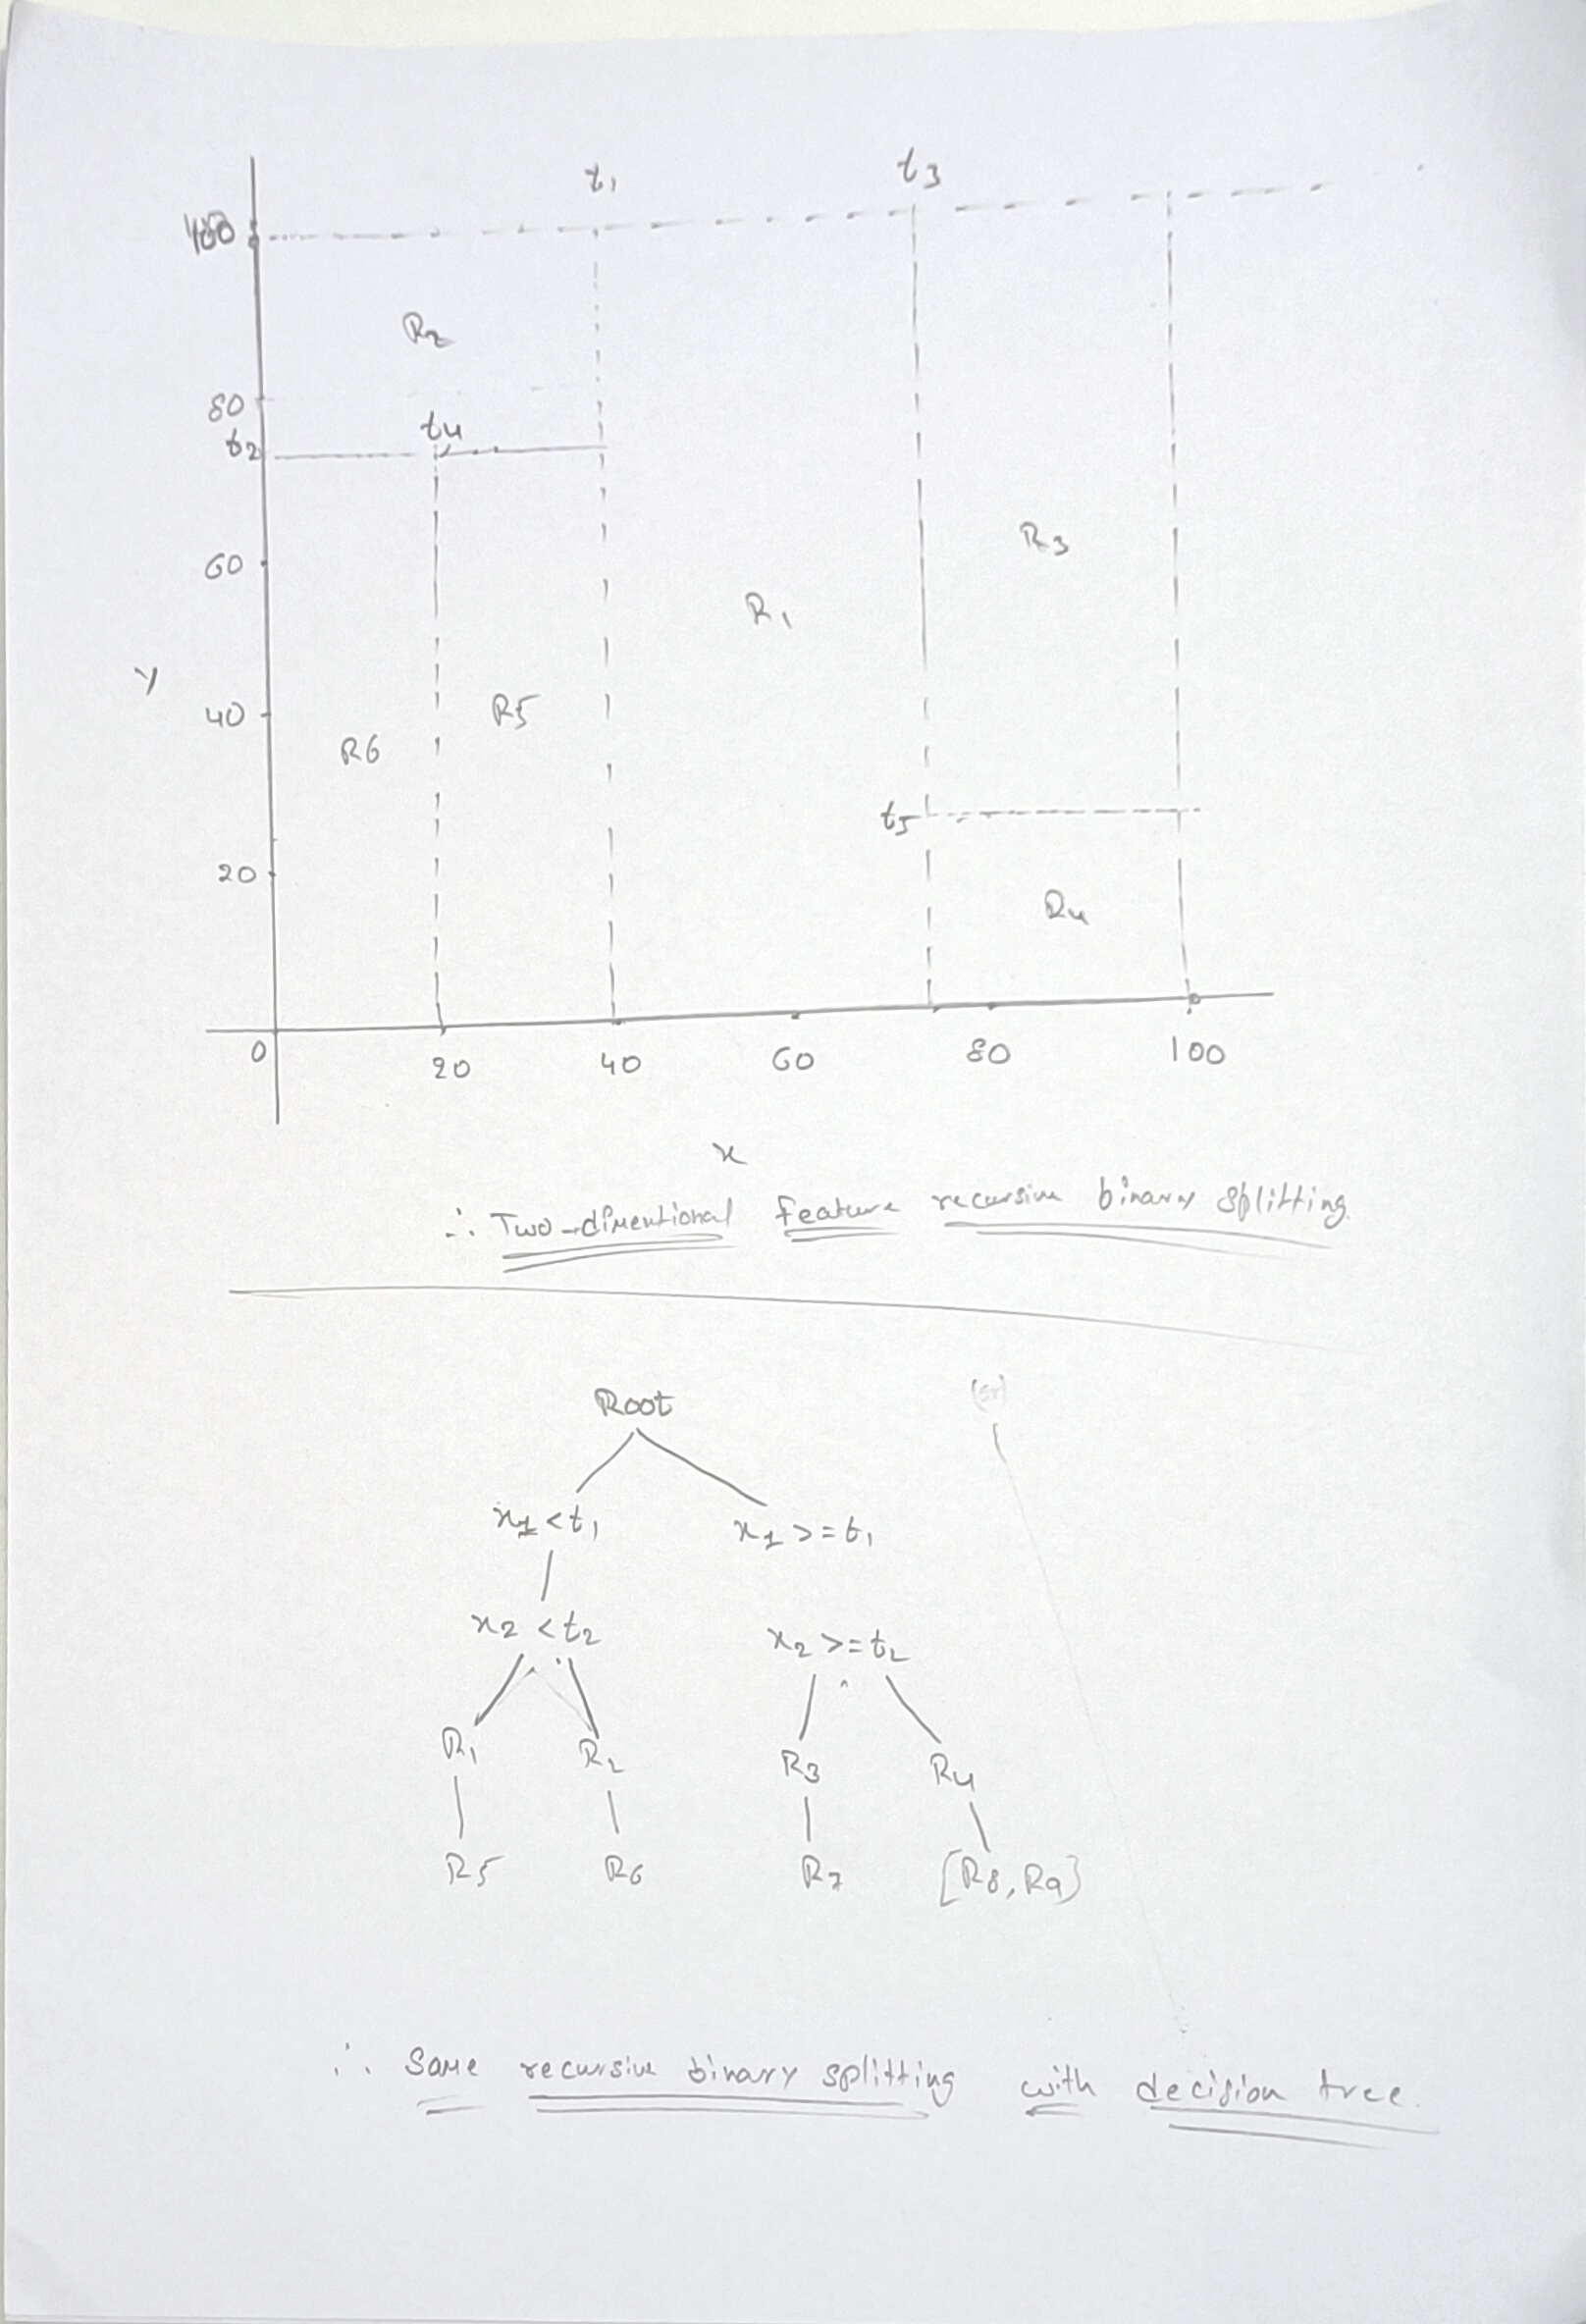

Q2. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P(Class is Red|X)$:

$0.1$, $0.15$, $0.2$, $0.2$, $0.55$, $0.6$, $0.6$, $0.65$, $0.7$, and $0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach , the second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In the majority vote approach, you would assign the class based on the most frequent prediction. In the average probability approach, you would take the average of the predicted probabilities and then assign the class based on a threshold (usually 0.5 for binary classification).

Let's calculate the final classification under each approach using the provided estimated probabilities:

Estimated Probabilities:
\[0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75\]

1. **Majority Vote Approach:**
   - Count the occurrences of each class prediction.
   - Assign the class with the majority of votes.

   Count of each class prediction:
   - Class 0 (Red): 4
   - Class 1 (Green): 6

   Since Class 1 (Green) has the majority of votes, the final classification is **Green**.

2. **Average Probability Approach:**
   - Calculate the average of the estimated probabilities.
   - Assign the class based on a threshold (usually 0.5 for binary classification).

   Average Probability: \((0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10 = 0.47\)

   Since the average probability is less than 0.5, the final classification is **Red**.

So, the final classification under the majority vote approach is **Green**, and under the average probability approach, it is **Red**.

ANSWER in the markdown cell

# APPLIED

Q3. Apply boosting and random forest to a data set of your choice. Feel free to use any of the datasets from ISLR dataset link provided ( https://book.huihoo.com/introduction-to-statistical-learning/data.html ) to examine any of the questions that were discussed in any of the previous homeworks. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods (e.g. linear or logistic regression models)? Which of these approaches yields the best performance?

#### ANSWER



In [ ]:
# import libraries

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


####a) Read the dataset using function read_csv( ) from pandas library and preprocess the data if required ( check for any missing values etc )



In [ ]:
df = pd.read_csv("Auto.csv")
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

<Axes: >

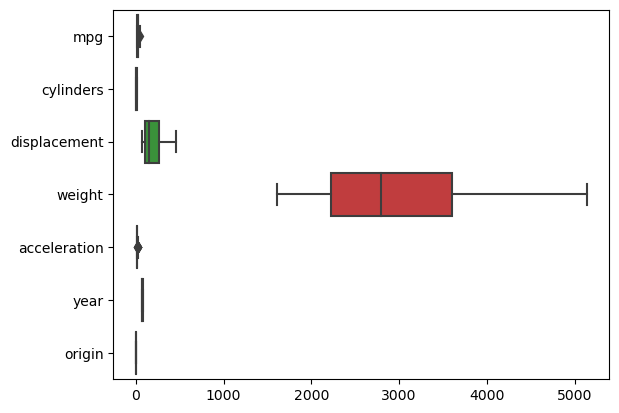

In [ ]:
sns.boxplot(data=df, orient="h")

In [ ]:
"""Please run this cell to replace outliers until outliers get replaced with median"""

# Define a function to replace outliers with the median
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.where((column >= lower_bound) & (column <= upper_bound), column.median())
    return column

# Apply the function to all numeric columns (excluding 'name' and 'mpg')
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].apply(replace_outliers_with_median)

<Axes: >

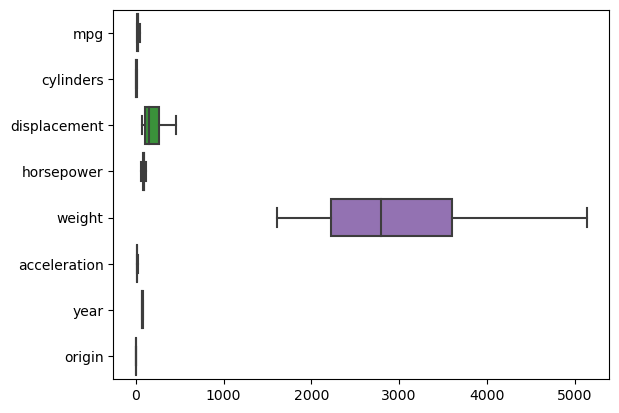

In [ ]:
sns.boxplot(data=df, orient="h")

In [ ]:
# Convert 'horsepower' column to numeric (assuming it's currently stored as string)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

#### b) Split the data into train data  and test data ( proportion of train and test data of your choice )

Reference :

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and Target variable (y)
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df['mpg']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (317, 7)
Shape of X_test: (80, 7)
Shape of y_train: (317,)
Shape of y_test: (80,)


####c) Train the data on the below models

i) Linear regression model
ii) Gradient boosting model
iii) Random forest model

check the train and test r2 score and mention your findings on which model performed better in terms of underfitting / overfitting etc

References:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#gradient-boosting-regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize models
linear_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions on training set
linear_train_predictions = linear_model.predict(X_train)
gb_train_predictions = gradient_boosting_model.predict(X_train)
rf_train_predictions = random_forest_model.predict(X_train)

# Make predictions on testing set
linear_test_predictions = linear_model.predict(X_test)
gb_test_predictions = gradient_boosting_model.predict(X_test)
rf_test_predictions = random_forest_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, actual):
    r2 = r2_score(actual, predictions)
    return r2

# Calculate R² scores for each model on training and testing sets
r2_linear_train = evaluate_model(linear_train_predictions, y_train)
r2_gb_train = evaluate_model(gb_train_predictions, y_train)
r2_rf_train = evaluate_model(rf_train_predictions, y_train)

r2_linear_test = evaluate_model(linear_test_predictions, y_test)
r2_gb_test = evaluate_model(gb_test_predictions, y_test)
r2_rf_test = evaluate_model(rf_test_predictions, y_test)

# Display the R² scores
print("Linear Regression - Train R²:", r2_linear_train, "Test R²:", r2_linear_test)
print("Gradient Boosting - Train R²:", r2_gb_train, "Test R²:", r2_gb_test)
print("Random Forest - Train R²:", r2_rf_train, "Test R²:", r2_rf_test)


Linear Regression - Train R²: 0.8381597737848678 Test R²: 0.8001691048149672
Gradient Boosting - Train R²: 0.9701657839915189 Test R²: 0.7839414458140113
Random Forest - Train R²: 0.9847734930618203 Test R²: 0.7832432745501525



1. **Linear Regression:**
   - Train R²: 0.838
   - Test R²: 0.800
   - **Findings:** The model performs well on both the training and testing sets, with a reasonably high R² score. There is no significant overfitting or underfitting.

2. **Gradient Boosting:**
   - Train R²: 0.970
   - Test R²: 0.784
   - **Findings:** The model performs exceptionally well on the training set (R² close to 1), but there is a noticeable drop in performance on the testing set. This indicates a potential overfitting issue.

3. **Random Forest:**
   - Train R²: 0.985
   - Test R²: 0.783
   - **Findings:** Similar to Gradient Boosting, the Random Forest model performs very well on the training set but shows a decrease in performance on the testing set. This also suggests potential overfitting.

**Summary:**
- Linear Regression seems to generalize well to the testing set, indicating a balanced performance.
- Gradient Boosting and Random Forest exhibit high accuracy on the training set but a noticeable drop on the testing set, indicating potential overfitting. Further model tuning or regularization might be considered to address this issue.
